In [ ]:
# krag 0.0.17 버전을 설치 (현재 버전을 사용할 경우 업데이트 차이에 따른 에러 발생)
!pip install krag==0.0.17

In [1]:
# .env 파일
from dotenv import load_dotenv
load_dotenv()

True

## K-RAG 패키지 
- pip isntall krag
- Hit Rate, MRR, Recall@k, Precision@k, mAP@k, NDCG@k 계산

In [12]:
from krag.document import KragDocument 
from krag.evaluators import OfflineRetrievalEvaluators

# 각 쿼리에 대한 정답 문서 
actual_docs = [
    # Query 1
    [
        KragDocument(metadata={'id': 1}, page_content='물건을 구매했습니다.'),
    ],
    # Query 2
    [
        KragDocument(metadata={'id': 2}, page_content='회의가 내일 있습니다.'),
        KragDocument(metadata={'id': 3}, page_content='오늘 날씨가 맑습니다.'),
    ],
]

# 각 쿼리에 대한 검색 결과 
predicted_docs = [
    # Query 1
    [
        KragDocument(metadata={'id': 4}, page_content='책을 읽고 있습니다.'),
        KragDocument(metadata={'id': 1}, page_content='물건을 구매했습니다.'),
    ],

    # Query 2
    [
        KragDocument(metadata={'id': 4}, page_content='책을 읽고 있습니다.'),
        KragDocument(metadata={'id': 1}, page_content='물건을 구매했습니다.'),
        KragDocument(metadata={'id': 2}, page_content='회의가 내일 있습니다.'),
        KragDocument(metadata={'id': 5}, page_content='점심을 먹으러 갑니다.'),
        KragDocument(metadata={'id': 3}, page_content='오늘 날씨가 맑습니다.'),
    ],
]


# 평가도구 초기화 
evaluator = OfflineRetrievalEvaluators(actual_docs, predicted_docs, match_method="text")

# k=None (전체 문서)일 때 평가지표 계산
hit_rate_all = evaluator.calculate_hit_rate()
mrr_all = evaluator.calculate_mrr()
recall_all = evaluator.calculate_recall()
precision_all = evaluator.calculate_precision()
map_all = evaluator.calculate_map()
ndcg_all = evaluator.calculate_ndcg()

print(f"Hit Rate (All): {hit_rate_all}")
print(f"MRR (All): {mrr_all}")
print(f"Recall (All): {recall_all}")
print(f"Precision (All): {precision_all}")
print(f"MAP (All): {map_all}")
print(f"NDCG (All): {ndcg_all}")

Hit Rate (All): 1.0
MRR (All): 0.41666666666666663
Recall (All): 1.0
Precision (All): 0.45
MAP (All): 0.43333333333333335
NDCG (All): 0.5873505313617415


In [13]:
## k=2일 때 평가지표 계산

hit_rate_k2 = evaluator.calculate_hit_rate(k=2)
mrr_k2 = evaluator.calculate_mrr(k=2)
recall_k2 = evaluator.calculate_recall(k=2)
precision_k2 = evaluator.calculate_precision(k=2)
map_k2 = evaluator.calculate_map(k=2)
ndcg_k2 = evaluator.calculate_ndcg(k=2)

print(f"Hit Rate (k=2): {hit_rate_k2}")
print(f"MRR (k=2): {mrr_k2}")
print(f"Recall (k=2): {recall_k2}")
print(f"Precision (k=2): {precision_k2}")
print(f"MAP (k=2): {map_k2}")
print(f"NDCG (k=2): {ndcg_k2}")

Hit Rate (k=2): 0.5
MRR (k=2): 0.25
Recall (k=2): 0.3333333333333333
Precision (k=2): 0.25
MAP (k=2): 0.25
NDCG (k=2): 0.31546487678572877


In [14]:
from krag.document import KragDocument 
from krag.evaluators import OfflineRetrievalEvaluators

# 각 쿼리에 대한 정답 문서 
actual_docs = [
    # Query 1
    [
        KragDocument(metadata={'id': 1}, page_content='물건을 구매했습니다.'),
    ],
    # Query 2
    [
        KragDocument(metadata={'id': 2}, page_content='회의가 내일 있습니다.'),
        KragDocument(metadata={'id': 3}, page_content='오늘 날씨가 맑습니다.'),
    ],
]

# 각 쿼리에 대한 검색 결과 
predicted_docs = [
    # Query 1
    [
        KragDocument(metadata={'id': 41}, page_content='책을 읽고 있습니다. 물건을 구매했습니다.'),
    ],

    # Query 2
    [
        KragDocument(metadata={'id': 41}, page_content='책을 읽고 있습니다. 물건을 구매했습니다.'),
        KragDocument(metadata={'id': 2}, page_content='회의가 내일 있습니다.'),
        KragDocument(metadata={'id': 35}, page_content='오늘 날씨가 맑습니다. 점심을 먹으러 갑니다.'),
    ],
]


# 평가도구 초기화 
evaluator = OfflineRetrievalEvaluators(actual_docs, predicted_docs, match_method="text")

# Calculate evaluation metrics / 평가지표 계산 
## k=None (전체 문서)일 때 평가지표 계산
hit_rate_all = evaluator.calculate_hit_rate()
mrr_all = evaluator.calculate_mrr()
recall_all = evaluator.calculate_recall()
precision_all = evaluator.calculate_precision()
map_all = evaluator.calculate_map()
ndcg_all = evaluator.calculate_ndcg()

print(f"Hit Rate (All): {hit_rate_all}")
print(f"MRR (All): {mrr_all}")
print(f"Recall (All): {recall_all}")
print(f"Precision (All): {precision_all}")
print(f"MAP (All): {map_all}")
print(f"NDCG (All): {ndcg_all}")

Hit Rate (All): 1.0
MRR (All): 0.75
Recall (All): 1.0
Precision (All): 0.8333333333333333
MAP (All): 0.7916666666666666
NDCG (All): 0.8467132018086354


In [15]:
## k=2일 때 평가지표 계산

hit_rate_k2 = evaluator.calculate_hit_rate(k=2)
mrr_k2 = evaluator.calculate_mrr(k=2)
recall_k2 = evaluator.calculate_recall(k=2)
precision_k2 = evaluator.calculate_precision(k=2)
map_k2 = evaluator.calculate_map(k=2)
ndcg_k2 = evaluator.calculate_ndcg(k=2)

print(f"Hit Rate (k=2): {hit_rate_k2}")
print(f"MRR (k=2): {mrr_k2}")
print(f"Recall (k=2): {recall_k2}")
print(f"Precision (k=2): {precision_k2}")
print(f"MAP (k=2): {map_k2}")
print(f"NDCG (k=2): {ndcg_k2}")

Hit Rate (k=2): 0.5
MRR (k=2): 0.75
Recall (k=2): 0.6666666666666666
Precision (k=2): 0.75
MAP (k=2): 0.75
NDCG (k=2): 0.8154648767857288


In [151]:
from krag.document import KragDocument 
from krag.evaluators import OfflineRetrievalEvaluators

# 각 쿼리에 대한 정답 문서 
actual_docs = [
    # Query 1
    [
        KragDocument(metadata={'id': 1}, page_content='물건을 구매했습니다.'),
    ],
    # Query 2
    [
        KragDocument(metadata={'id': 2}, page_content='회의가 내일 있습니다.'),
        KragDocument(metadata={'id': 3}, page_content='오늘 날씨가 맑습니다.'),
    ],
]

# 각 쿼리에 대한 검색 결과 
predicted_docs = [
    # Query 1
    [
        KragDocument(metadata={'id': 10}, page_content='물건을 구매했어요.'),
    ],

    # Query 2
    [
        KragDocument(metadata={'id': 10}, page_content='물건을 구매했어요.'),
        KragDocument(metadata={'id': 20}, page_content='회의가 내일 있어요.'),
        KragDocument(metadata={'id': 30}, page_content='오늘 날씨가 맑아요.'),
    ],
]


# 평가도구 초기화 
evaluator = OfflineRetrievalEvaluators(actual_docs, predicted_docs, match_method="text")

# Calculate evaluation metrics / 평가지표 계산 
## k=None (전체 문서)일 때 평가지표 계산
hit_rate_all = evaluator.calculate_hit_rate()
mrr_all = evaluator.calculate_mrr()
recall_all = evaluator.calculate_recall()
precision_all = evaluator.calculate_precision()
map_all = evaluator.calculate_map()
ndcg_all = evaluator.calculate_ndcg()

print(f"Hit Rate (All): {hit_rate_all}")
print(f"MRR (All): {mrr_all}")
print(f"Recall (All): {recall_all}")
print(f"Precision (All): {precision_all}")
print(f"MAP (All): {map_all}")
print(f"NDCG (All): {ndcg_all}")

Hit Rate (All): 0.0
MRR (All): 0.0
Recall (All): 0.0
Precision (All): 0.0
MAP (All): 0.0
NDCG (All): 0.0


In [152]:
from krag.document import KragDocument
from krag.evaluators import RougeOfflineRetrievalEvaluators

# Initialize the evaluator with ROUGE matching / ROUGE 매칭을 사용한 평가도구 초기화 
evaluator = RougeOfflineRetrievalEvaluators(actual_docs, predicted_docs, match_method="rouge1", threshold=0.5)

# Calculate evaluation metrics / 평가지표 계산 
## k=None (전체 문서)일 때 평가지표 계산
hit_rate_all = evaluator.calculate_hit_rate()
mrr_all = evaluator.calculate_mrr()
recall_all = evaluator.calculate_recall()
precision_all = evaluator.calculate_precision()
map_all = evaluator.calculate_map()
ndcg_all = evaluator.calculate_ndcg()

print(f"Hit Rate (All): {hit_rate_all}")
print(f"MRR (All): {mrr_all}")
print(f"Recall (All): {recall_all}")
print(f"Precision (All): {precision_all}")
print(f"MAP (All): {map_all}")
print(f"NDCG (All): {ndcg_all}")

Hit Rate (All): 1.0
MRR (All): 0.75
Recall (All): 1.0
Precision (All): 0.8333333333333333
MAP (All): 0.7916666666666666
NDCG (All): 0.8467132018086354


In [153]:
## k=2일 때 평가지표 계산

hit_rate_k2 = evaluator.calculate_hit_rate(k=2)
mrr_k2 = evaluator.calculate_mrr(k=2)
recall_k2 = evaluator.calculate_recall(k=2)
precision_k2 = evaluator.calculate_precision(k=2)
map_k2 = evaluator.calculate_map(k=2)
ndcg_k2 = evaluator.calculate_ndcg(k=2)

print(f"Hit Rate (k=2): {hit_rate_k2}")
print(f"MRR (k=2): {mrr_k2}")
print(f"Recall (k=2): {recall_k2}")
print(f"Precision (k=2): {precision_k2}")
print(f"MAP (k=2): {map_k2}")
print(f"NDCG (k=2): {ndcg_k2}")

Hit Rate (k=2): 0.5
MRR (k=2): 0.75
Recall (k=2): 0.6666666666666666
Precision (k=2): 0.75
MAP (k=2): 0.75
NDCG (k=2): 0.8154648767857287


## 1. Data 준비

`(1) Documents 로드`

In [33]:
# 문서를 로드
from langchain_community.document_loaders import TextLoader

loader = TextLoader('Rivian.txt', encoding='utf-8')
data = loader.load()

print(type(data))
print(len(data))

<class 'list'>
1


In [34]:
data[0]

Document(metadata={'source': 'Rivian.txt'}, page_content='리비안은 MIT 박사 출신 RJ 스카린지가 2009년에 설립한 혁신적인 미국 전기차 제조업체입니다. 2011년부터 자율 전기차에 집중한 리비안은 2015년 대규모 투자를 통해 크게 성장하며 미시간과 베이 지역에 연구소를 설립했습니다. 주요 공급업체와의 접근성을 높이기 위해 본사를 미시간주 리보니아로 이전했습니다.\n\n리비안의 초기 모델은 스포츠카 R1(원래 이름은 Avera)로, 2+2 좌석의 미드 엔진 하이브리드 쿠페로 피터 스티븐스가 디자인했습니다. 이 차는 쉽게 교체 가능한 본체 패널을 갖춘 모듈식 캡슐 구조를 특징으로 하며, 2013년 말에서 2014년 초 사이에 생산이 예상되었습니다. 리비안은 디젤 하이브리드 버전, 브라질 원메이크 시리즈를 위한 R1 GT 레이싱 버전, 4도어 세단 및 크로스오버 등 다양한 버전을 고려했습니다. 2011년에 프로토타입 해치백도 공개되었지만, R1과의 관계는 불명확합니다.\n\n리비안은 2021년 10월 첫 번째 양산 차량인 R1T 트럭을 고객에게 인도하기 시작했습니다.\n')

In [35]:
len(data[0].page_content)

514

In [82]:
# 문장을 구분하여 분할 
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    model_name="text-embedding-3-small",
    chunk_size=60,
    chunk_overlap=10,
)

docs = text_splitter.split_documents(data)

len(docs)

11

In [83]:
# 데이터프레임으로 변환
import pandas as pd

test_data = []
for i, doc in enumerate(docs):
    metadata = doc.metadata
    metadata.update({'doc_id': i})
    test_data.append({
        'context': [doc.page_content],
        'metadata': [metadata],
    })

df_test = pd.DataFrame(test_data)

df_test

,context,metadata
0,[리비안은 MIT 박사 출신 RJ 스카린지가 2009년에 설립한 혁신적인 미국 전기...,"[{'source': 'Rivian.txt', 'doc_id': 0}]"
1,[2011년부터 자율 전기차에 집중한 리비안은 2015년 대규모 투자를 통해 크게 ...,"[{'source': 'Rivian.txt', 'doc_id': 1}]"
2,[미시간과 베이 지역에 연구소를 설립했습니다. 주요 공급업체와의 접근성을 높이기 위...,"[{'source': 'Rivian.txt', 'doc_id': 2}]"
3,[본사를 미시간주 리보니아로 이전했습니다.],"[{'source': 'Rivian.txt', 'doc_id': 3}]"
4,"[리비안의 초기 모델은 스포츠카 R1(원래 이름은 Avera)로, 2+2 좌석의 미...","[{'source': 'Rivian.txt', 'doc_id': 4}]"
5,[엔진 하이브리드 쿠페로 피터 스티븐스가 디자인했습니다. 이 차는 쉽게 교체 가능한...,"[{'source': 'Rivian.txt', 'doc_id': 5}]"
6,"[가능한 본체 패널을 갖춘 모듈식 캡슐 구조를 특징으로 하며, 2013년 말에서 2...","[{'source': 'Rivian.txt', 'doc_id': 6}]"
7,"[초 사이에 생산이 예상되었습니다. 리비안은 디젤 하이브리드 버전, 브라질 원메이크...","[{'source': 'Rivian.txt', 'doc_id': 7}]"
8,"[R1 GT 레이싱 버전, 4도어 세단 및 크로스오버 등 다양한 버전을 고려했습니다...","[{'source': 'Rivian.txt', 'doc_id': 8}]"
9,"[프로토타입 해치백도 공개되었지만, R1과의 관계는 불명확합니다.]","[{'source': 'Rivian.txt', 'doc_id': 9}]"


In [84]:
context = " ".join(df_test['context'][0])

context

'리비안은 MIT 박사 출신 RJ 스카린지가 2009년에 설립한 혁신적인 미국 전기차 제조업체입니다. 2011년부터'

`(2) question - answer 합성`

In [85]:
# Structured Output
from langchain_core.pydantic_v1 import BaseModel, Field
from typing import List

class QA(BaseModel):
    """Information about a question-answer pair."""
    question: str = Field(description="Question")
    answer: str = Field(description="Answer")

class QAData(BaseModel):
    """Extracted data about question-answer pairs."""
    data: List[QA]

In [86]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate

model = ChatOpenAI(
    model="gpt-4o-mini",
    max_tokens=200,
    temperature=0,
)

qa_generator = model.with_structured_output(QAData)

# QA 생성 템플릿
system = """Your task is to create {num_questions_per_chunk} fact-based question-answer pairs based on the provided context.
Each fact-based question should be answerable with a specific, concise piece of factual information from the context.
Avoid including phrases like "according to the passage" or "based on the context" in your questions.
Ensure that the answer includes the essence of the question to provide clear and complete information.."""

QA_generation_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "Context: {context}\nOutput (Provide a complete sentence in KOREAN):"),
    ]
)

QA_generate_chain = QA_generation_prompt | qa_generator
response = QA_generate_chain.invoke({"context":context, "num_questions_per_chunk":2})

response

QAData(data=[QA(question='리비안은 언제 설립되었나요?', answer='리비안은 2009년에 설립되었습니다.'), QA(question='리비안의 설립자는 누구인가요?', answer='리비안의 설립자는 MIT 박사 출신 RJ 스카린지입니다.')])

In [87]:
response.data

[QA(question='리비안은 언제 설립되었나요?', answer='리비안은 2009년에 설립되었습니다.'),
 QA(question='리비안의 설립자는 누구인가요?', answer='리비안의 설립자는 MIT 박사 출신 RJ 스카린지입니다.')]

In [88]:
# 전체 문서에 대해 QA 생성 - Chunk 당 2개의 질문-답변 쌍 생성

NUM_QUESTIONS_PER_CHUNK = 2
outputs = []
for row in df_test.iterrows():

    context = " ".join(row[1]['context'][0])

    response = QA_generate_chain.invoke({"context":context, "num_questions_per_chunk":NUM_QUESTIONS_PER_CHUNK})

    try:
        matches = [(qa.question, qa.answer) for qa in response.data]
        outputs += [{
            "context": row[1]['context'],
            "question": q.strip(), 
            "answer": a.strip(),
            "metadata": row[1]['metadata'],
            } for q, a in matches if len(a.strip()) < 100]

    except:
        continue


df_qa_test = pd.DataFrame(outputs)
print(df_qa_test.shape)

df_qa_test.head()

(22, 4)


,context,question,answer,metadata
0,[리비안은 MIT 박사 출신 RJ 스카린지가 2009년에 설립한 혁신적인 미국 전기...,리 비 안의 설립 연도는 언제인가요?,리 비 안은 2009년에 설립되었습니다.,"[{'source': 'Rivian.txt', 'doc_id': 0}]"
1,[리비안은 MIT 박사 출신 RJ 스카린지가 2009년에 설립한 혁신적인 미국 전기...,리 비 안의 창립자는 누구인가요?,리 비 안의 창립자는 R J 스카린지입니다.,"[{'source': 'Rivian.txt', 'doc_id': 0}]"
2,[2011년부터 자율 전기차에 집중한 리비안은 2015년 대규모 투자를 통해 크게 ...,자율 전기차에 집중한 리비안은 언제부터 시작했나요?,리비안은 2011년부터 자율 전기차에 집중하기 시작했습니다.,"[{'source': 'Rivian.txt', 'doc_id': 1}]"
3,[2011년부터 자율 전기차에 집중한 리비안은 2015년 대규모 투자를 통해 크게 ...,리비안은 어떤 방식으로 성장했나요?,리비안은 2015년 대규모 투자를 통해 크게 성장했습니다.,"[{'source': 'Rivian.txt', 'doc_id': 1}]"
4,[미시간과 베이 지역에 연구소를 설립했습니다. 주요 공급업체와의 접근성을 높이기 위...,미시간 주에 설립된 연구소의 목적은 무엇인가요?,주요 공급 업체와의 접근성을 높이기 위해 설립되었습니다.,"[{'source': 'Rivian.txt', 'doc_id': 2}]"


In [89]:
df_qa_test.to_excel("qa_test.xlsx", index=False)

`(3) 테스트 데이터 검토 및 수정`

In [90]:
# Test 데이터셋에 대한 QA 생성 결과를 리뷰한 후 다시 로드
import pandas as pd

df_qa_test = pd.read_excel("qa_test.xlsx")
print(df_qa_test.shape)

df_qa_test.head()

(22, 4)


,context,question,answer,metadata
0,['리비안은 MIT 박사 출신 RJ 스카린지가 2009년에 설립한 혁신적인 미국 전...,리 비 안의 설립 연도는 언제인가요?,리 비 안은 2009년에 설립되었습니다.,"[{'source': 'Rivian.txt', 'doc_id': 0}]"
1,['리비안은 MIT 박사 출신 RJ 스카린지가 2009년에 설립한 혁신적인 미국 전...,리 비 안의 창립자는 누구인가요?,리 비 안의 창립자는 R J 스카린지입니다.,"[{'source': 'Rivian.txt', 'doc_id': 0}]"
2,['2011년부터 자율 전기차에 집중한 리비안은 2015년 대규모 투자를 통해 크게...,자율 전기차에 집중한 리비안은 언제부터 시작했나요?,리비안은 2011년부터 자율 전기차에 집중하기 시작했습니다.,"[{'source': 'Rivian.txt', 'doc_id': 1}]"
3,['2011년부터 자율 전기차에 집중한 리비안은 2015년 대규모 투자를 통해 크게...,리비안은 어떤 방식으로 성장했나요?,리비안은 2015년 대규모 투자를 통해 크게 성장했습니다.,"[{'source': 'Rivian.txt', 'doc_id': 1}]"
4,['미시간과 베이 지역에 연구소를 설립했습니다. 주요 공급업체와의 접근성을 높이기 ...,미시간 주에 설립된 연구소의 목적은 무엇인가요?,주요 공급 업체와의 접근성을 높이기 위해 설립되었습니다.,"[{'source': 'Rivian.txt', 'doc_id': 2}]"


## 2. Information Retrieval 평가지표
- K-RAG 패키지 사용 (pip isntall krag)
- Hit Rate, MRR, Recall@k, Precision@k, mAP@k, NDCG@k 계산

In [95]:
# 코사인 유사도 적용하여 인덱싱

from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings

embeddings_model= OpenAIEmbeddings(model="text-embedding-3-small")

vectorstore = Chroma.from_documents(
    documents=docs, 
    embedding=embeddings_model,
    collection_name="qa_test",
    )

retriever = vectorstore.as_retriever(
    search_kwargs={"k":5}
)

In [96]:
# 테스트 데이터의 첫 번째 질문
question = df_qa_test['question'].iloc[0]
print("question:", question)

question: 리 비 안의 설립 연도는 언제인가요?


In [107]:
# 테스트 데이터셋의 객체를 문서로 변환

def convert_to_document(df_test, idx):
    context_docs = []

    context = eval(df_test['context'].iloc[idx])
    metadata = []

    for m in eval(df_test['metadata'].iloc[idx]):
        if isinstance(m, str):
            metadata.append(eval(m))
        else:
            metadata.append(m)

    for c, m in zip(context, metadata):
        doc = KragDocument(page_content=c, metadata=m)
        context_docs.append(doc)

    return context_docs

# 문서 객체로 변환
context_docs = convert_to_document(df_qa_test, 0)
context_docs

[KragDocument(metadata={'source': 'Rivian.txt', 'doc_id': 0}, page_content='리비안은 MIT 박사 출신 RJ 스카린지가 2009년에 설립한 혁신적인 미국 전기차 제조업체입니다. 2011년부터')]

In [108]:
# BM25 검색기를 사용하여 문서 검색

retrieved_docs = retriever.invoke(question)

# 검색 결과 출력 
for doc in retrieved_docs:
    print(doc.metadata.get('doc_id'))
    print(doc.page_content)
    print("------------------------------")

0
리비안은 MIT 박사 출신 RJ 스카린지가 2009년에 설립한 혁신적인 미국 전기차 제조업체입니다. 2011년부터
------------------------------
10
리비안은 2021년 10월 첫 번째 양산 차량인 R1T 트럭을 고객에게 인도하기 시작했습니다.
------------------------------
3
본사를 미시간주 리보니아로 이전했습니다.
------------------------------
4
리비안의 초기 모델은 스포츠카 R1(원래 이름은 Avera)로, 2+2 좌석의 미드 엔진 하이브리드
------------------------------
7
초 사이에 생산이 예상되었습니다. 리비안은 디젤 하이브리드 버전, 브라질 원메이크 시리즈를 위한 R1 GT 레이싱
------------------------------


`(1) Hit Rate`
- 전체 예측 문서 중 실제 관련 문서가 포함된 비율을 측정 (순서와 무관)
- 예측 문서에 포함되면 1이고 그렇지 않으면 0

In [109]:
# 평가도구 초기화 
evaluator = OfflineRetrievalEvaluators(
    actual_docs=[context_docs], 
    predicted_docs=[retrieved_docs], 
    )

# 평가지표 계산 
hit_rate = evaluator.calculate_hit_rate()

# 결과 출력
print(f"Hit Rate: {hit_rate:.2f}")

Hit Rate: 1.00


In [110]:
# k 값에 따른 평가지표 계산하는 함수를 정의 
hitrate_ouputs = {}
for k in range(1, 6):
    hit_rate = evaluator.calculate_hit_rate(k=k)
    print(f"HitRate@{k}: {hit_rate:.2f}")

    hitrate_ouputs[f"HitRate@{k}"] = hit_rate

df_hitrate = pd.DataFrame([hitrate_ouputs])
df_hitrate

HitRate@1: 1.00
HitRate@2: 1.00
HitRate@3: 1.00
HitRate@4: 1.00
HitRate@5: 1.00


,HitRate@1,HitRate@2,HitRate@3,HitRate@4,HitRate@5
0,1.0,1.0,1.0,1.0,1.0


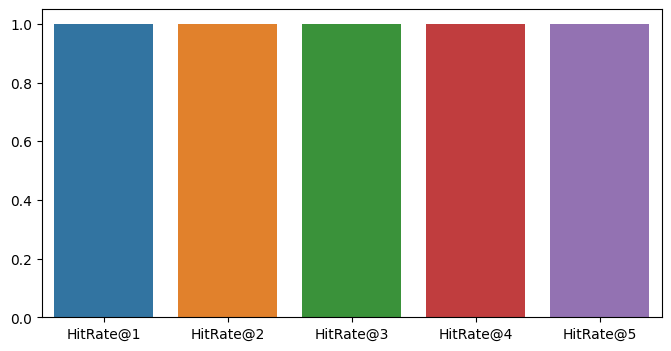

In [111]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.barplot(data=df_hitrate)
plt.show()

In [112]:
# 전체 테스트 데이터에 적용
context_docs = [convert_to_document(df_qa_test, i) for i in range(len(df_qa_test))]
predicted_docs = [retriever.invoke(q) for q in df_qa_test['question']]

# 평가도구 초기화
evaluator = OfflineRetrievalEvaluators(
    actual_docs=context_docs,
    predicted_docs=predicted_docs,
)

# 평가지표 계산
hit_rate = evaluator.calculate_hit_rate()

# 결과 출력
print(f"Hit Rate: {hit_rate:.2f}")

Hit Rate: 1.00


In [113]:
# k 값에 따른 평가지표 계산하는 함수를 정의 
hitrate_ouputs = {}
for k in range(1, 6):
    hit_rate = evaluator.calculate_hit_rate(k=k)
    print(f"HitRate@{k}: {hit_rate:.2f}")

    hitrate_ouputs[f"HitRate@{k}"] = hit_rate

df_hitrate = pd.DataFrame([hitrate_ouputs])
df_hitrate

HitRate@1: 0.86
HitRate@2: 0.95
HitRate@3: 0.95
HitRate@4: 1.00
HitRate@5: 1.00


,HitRate@1,HitRate@2,HitRate@3,HitRate@4,HitRate@5
0,0.863636,0.954545,0.954545,1.0,1.0


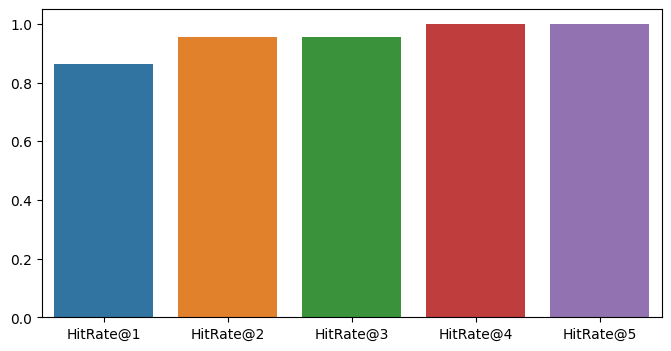

In [114]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.barplot(data=df_hitrate)
plt.show()

`(2) MRR (Mean Reciprocal Rank)`
- 관련 문서가 반환된 순위의 역수를 계산한 후 그 평균을 구하는 방법
- MRR은 사용자가 원하는 결과를 얼마나 빨리 찾을 수 있는지를 평가 (순서를 고려)

In [115]:
# k 값에 따른 MRR 평가지표 계산

mrr_ouputs = {}
for k in range(1, 6):
    mrr = evaluator.calculate_mrr(k=k)
    print(f"MRR@{k}: {mrr:.2f}")

    mrr_ouputs[f"MRR@{k}"] = mrr

df_mrr = pd.DataFrame([mrr_ouputs])
df_mrr

MRR@1: 0.86
MRR@2: 0.91
MRR@3: 0.91
MRR@4: 0.92
MRR@5: 0.92


,MRR@1,MRR@2,MRR@3,MRR@4,MRR@5
0,0.863636,0.909091,0.909091,0.920455,0.920455


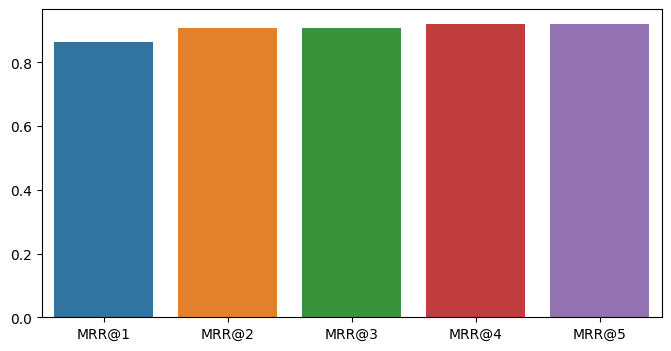

In [116]:
# 시각화
plt.figure(figsize=(8, 4))
sns.barplot(data=df_mrr)
plt.show()

`(3) Recall@k`

- 주어진 실제 문서 리스트와 예측 문서 리스트를 비교하여 실제 문서가 예측 문서 리스트의 상위 k개에 포함되는 비율

In [117]:
# k 값에 따른 Recall 평가지표 계산

recall_ouputs = {}
for k in range(1, 6):
    recall = evaluator.calculate_recall(k=k)
    print(f"Recall@{k}: {recall:.2f}")

    recall_ouputs[f"Recall@{k}"] = recall


df_recall = pd.DataFrame([recall_ouputs])
df_recall

Recall@1: 0.86
Recall@2: 0.95
Recall@3: 0.95
Recall@4: 1.00
Recall@5: 1.00


,Recall@1,Recall@2,Recall@3,Recall@4,Recall@5
0,0.863636,0.954545,0.954545,1.0,1.0


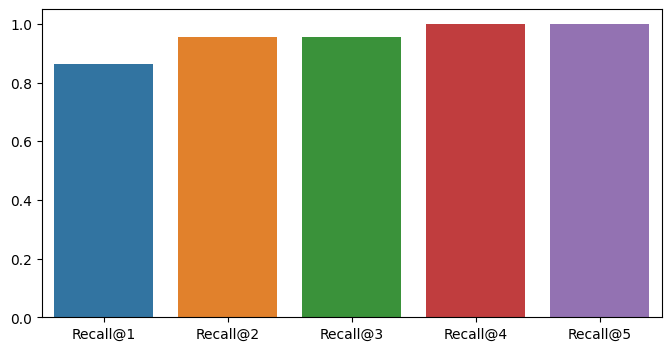

In [119]:
# 시각화
plt.figure(figsize=(8, 4))
sns.barplot(data=df_recall)
plt.show()

`(4) mAP@k (Mean Average Precision at k)`
- mAP@k는 검색 결과의 평균 정밀도를 측정하는 지표
- 각 문서의 평균 정밀도를 계산하고, 이들의 평균을 계산 (특히 k개의 상위 예측 문서 내에서 측정)

In [120]:
# k 값에 따른 MAP@k 평가지표 계산

map_ouputs = {}
for k in range(1, 6):
    map = evaluator.calculate_map(k=k)
    print(f"MAP@{k}: {map:.2f}")

    map_ouputs[f"MAP@{k}"] = map

df_map = pd.DataFrame([map_ouputs])
df_map

MAP@1: 0.86
MAP@2: 0.91
MAP@3: 0.91
MAP@4: 0.92
MAP@5: 0.92


,MAP@1,MAP@2,MAP@3,MAP@4,MAP@5
0,0.863636,0.909091,0.909091,0.920455,0.920455


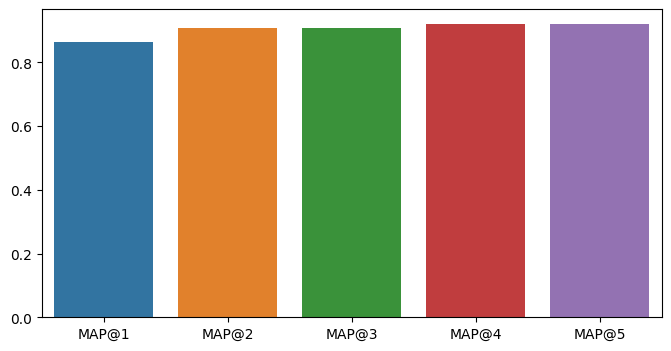

In [121]:
# 시각화
plt.figure(figsize=(8, 4))
sns.barplot(data=df_map)
plt.show()

`(5) NDCG (Normalized Discounted Cumulative Gain)`
- NDCG는 추천 시스템에서 결과의 순서가 얼마나 잘 맞는지를 평가하는 지표
- 각 문서의 순위에 따라 가중치를 부여하여 순위가 높은 관련 문서가 더 큰 영향을 주는 것으로 측정

In [122]:
# k 값에 따른 NDCG@k 평가지표 계산

ndcg_ouputs = {}

for k in range(1, 6):
    ndcg = evaluator.calculate_ndcg(k=k)
    print(f"NDCG@{k}: {ndcg:.2f}")

    ndcg_ouputs[f"NDCG@{k}"] = ndcg

df_ndcg = pd.DataFrame([ndcg_ouputs])
df_ndcg

NDCG@1: 0.86
NDCG@2: 0.92
NDCG@3: 0.92
NDCG@4: 0.94
NDCG@5: 0.94


,NDCG@1,NDCG@2,NDCG@3,NDCG@4,NDCG@5
0,0.863636,0.920994,0.920994,0.94057,0.94057


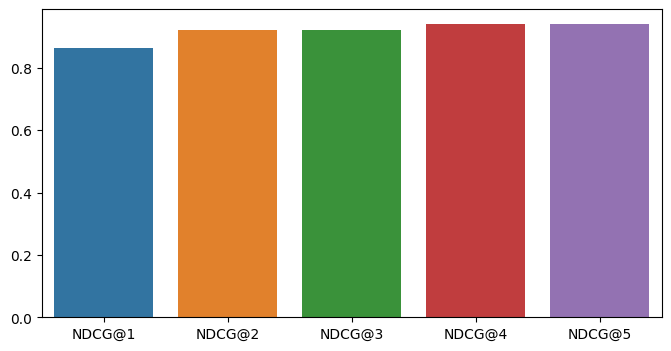

In [123]:
# 시각화
plt.figure(figsize=(8, 4))
sns.barplot(data=df_ndcg)
plt.show()